# Session 3 - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


We want to decide what advertising budget (TV, radio, newspaper) we should select to predict sales.<br>
The data is provided in `Advertising.csv` 

We import the dataset, using the first column as index.

In [2]:
## your code here ##
ad_df=pd.read_csv("Advertising.csv", index_col=0)
ad_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Descriptive Statistics & Exploratory Analysis

Let us get familiar with the data

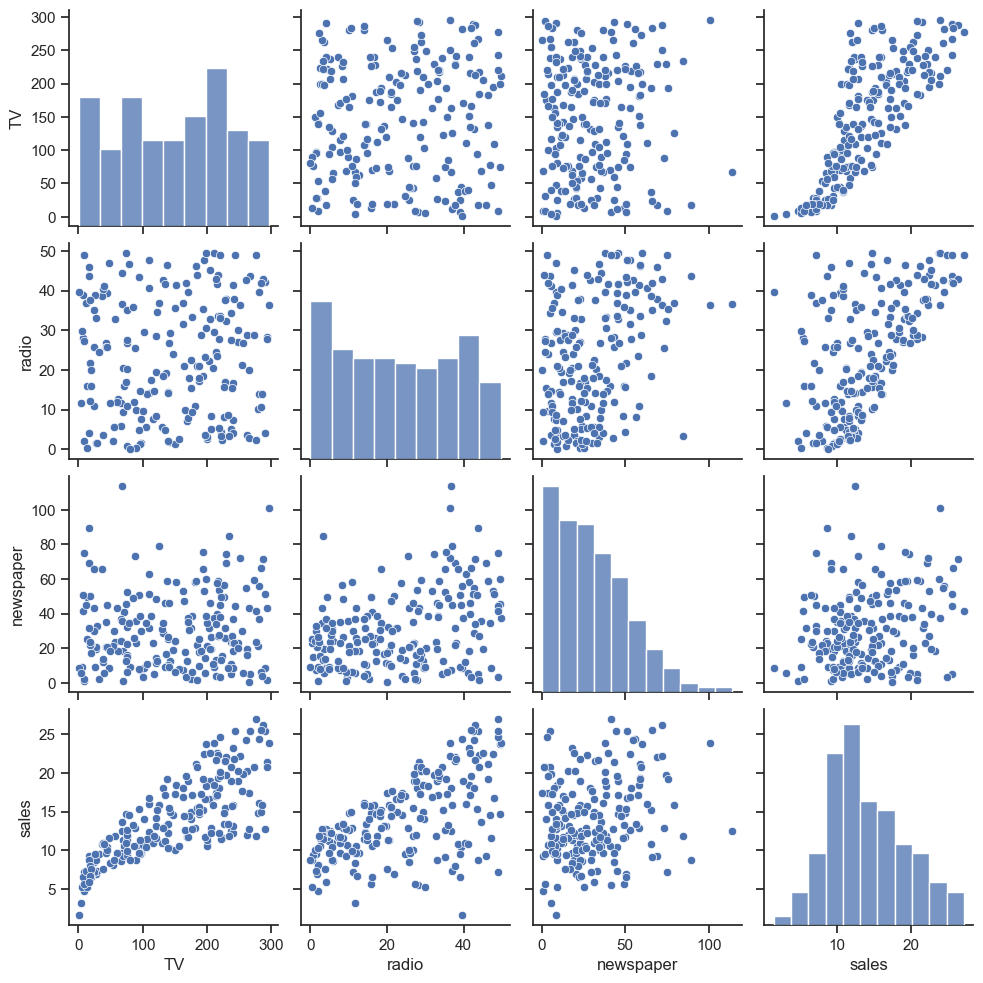

In [3]:
# scatter plot matrix
sns.set_theme(style="ticks") 
sns.pairplot(ad_df) ;
## your code here ##

<Axes: >

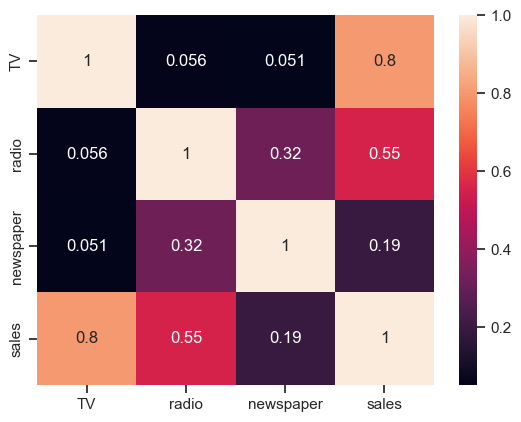

In [4]:
# Create a heatmap pairplot
sns.heatmap(ad_df.corr(method='spearman'),annot=True)
## your code here ##

This bivariate analysis shows several things :
- The relationship between the outcome (sales) and the predictors are non linear (check the trend). 
- Thus some adjustment may be needed by introducing interaction terms or transformation or even polynomial terms.
- The pair correlation heatmap should be computed with Spearman's method as the assumption of linearity is not met.

Les us examine more closely the most significant scatter plot and draw a regression line.

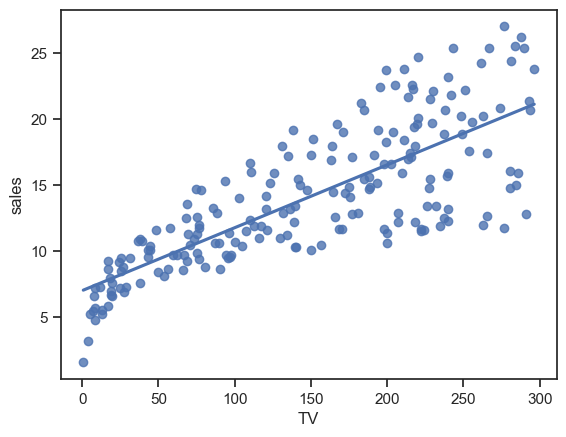

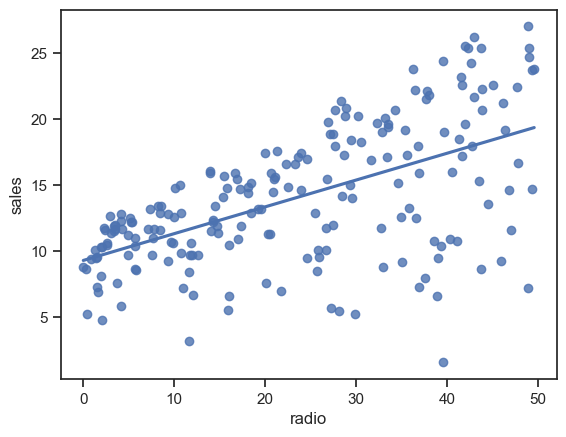

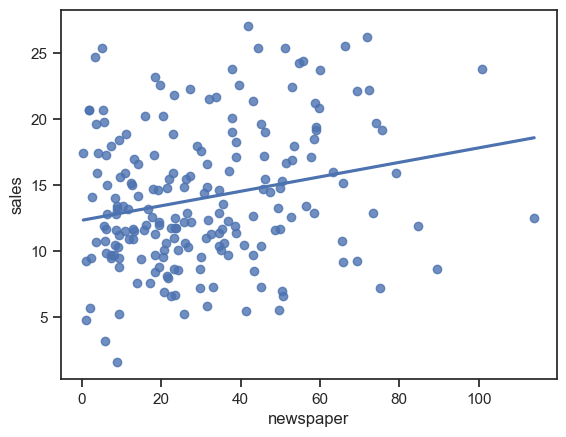

In [5]:
# Create the scatter plot with regression line
for i in ad_df.columns[:-1]:
## your code here ##
    sns.regplot(x = i, 
                y = "sales",  
                ci = None, 
                data = ad_df) 
    plt.show()
# Show the plot

## your code here ##

- The non linearity is quite obvious
- There is also some heteroscedasticity

## An example of simple linear regression

Let us take the above example, as an illustration of simple linear regression (meaning : one predictor only)

In [6]:
# instantiate a linear regression model from scikit learn
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
## your code here ##

In [7]:
# define the outcome (sales) and the predictor (TV)
X=ad_df[["TV"]]
y=ad_df[["sales"]]
## your code here ##

In [8]:
# fit the model on the whole dataset (find the paremeters that minimize SSE)
linreg.fit(X,y)
## your code here ##

LinearRegression()

In [9]:
# predict the outbut, from the predictor alone and save the result
y_pred=linreg.predict(X)
## your code here ##

In [10]:
# compute RMSE and RMSE/mean(Y) : the coefficient of variation of the errors
from sklearn.metrics import mean_squared_error

RMSE=np.sqrt(mean_squared_error(y,y_pred))
rmse_per_mean=RMSE/np.mean(ad_df["sales"])
## your code here ##

In [11]:
# compute R² and R²adjusted
from sklearn.metrics import r2_score

r_sq=r2_score(y,y_pred)

n=ad_df.shape[0]
p=ad_df.shape[1]

adj_r=1 - (1 - r_sq) * ((n - 1)/(n - p - 1))


## your code here ##

Now, let us create a function that computes all the performance indicators for a linear regression

In [12]:
## your code here ##

def lin_r(X, y):
    linreg = LinearRegression()
    lins = linreg.fit(X, y)
    y_pred = linreg.predict(X)
    RMSE = np.sqrt(mean_squared_error(y, y_pred))
    rmse_per_mean = RMSE / np.mean(y)
    r_sq = r2_score(y, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    
    adj_r = 1 - (1 - r_sq) * ((n - 1) / (n - p - 1))
    
    print(f"the RMSE is {RMSE:.3f}")
    print(f"the RMSE per mean is {rmse_per_mean:.3f}")
    print(f"the r square is {r_sq:.3f}")
    print(f"the adj r square is {adj_r:.3f}")
    
    return lins, RMSE, rmse_per_mean, r_sq, adj_r
    
    

x=ad_df[["TV"]]
y=ad_df[["sales"]]
lins,RMSE,rmse_per_mean,r_sq,adj_r=lin_r(x,y)

    

the RMSE is 3.242
the RMSE per mean is 0.231
the r square is 0.612
the adj r square is 0.610


Save the results (outputs) of the performance function and print them

In [13]:
## your code here ##

check the type of object we get after fitting (use dir)

In [14]:
## your code here ##
dir(lin_r)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__type_params__']

## Multiple Linear Regression - Step 1

compare the results when we include the two first variables

In [15]:
# Select radio and TV as predictors
x=ad_df[["TV","radio"]]
y=ad_df['sales']

## your code here ##

In [16]:
# Compute performance
lins,RMSE,rmse_per_mean,r_sq,adj_r=lin_r(x,y)

## your code here ##

the RMSE is 1.669
the RMSE per mean is 0.119
the r square is 0.897
the adj r square is 0.896


In [17]:
# Print the results

## your code here ##

the performance of our model has dramatically improved

Let us create a table summarizing all the relevant outputs

In [18]:
coef=lins.coef_
coef

array([0.04575482, 0.18799423])

In [19]:
def lin_table(model, X, y):
    coef = model.coef_
    intercept = model.intercept_
    
    std_features = np.std(X, axis=0)
    std_y = np.std(y)
    
    # Calculate standardized coefficients
    std_coef = coef * (std_features / std_y)
    
    # Create variable names
    if isinstance(X, pd.DataFrame):
        var_names = X.columns
    else:
        var_names = [f'X{i}' for i in range(X.shape[1])]
    
    # Create DataFrame with coefficients and standardized coefficients
    results = pd.DataFrame({
        "Variable": var_names,
        "Coefficient": coef,
        "Standardized Coefficient": std_coef
    })
    
    # Add intercept to the DataFrame
    intercept_row = pd.DataFrame({
        "Variable": ["Intercept"],
        "Coefficient": [intercept],
        "Standardized Coefficient": [0]  # Intercept is not standardized
    })
    
    results = pd.concat([intercept_row, results], ignore_index=True)
    print("Regression Coefficients Table:")
    print(results.to_string(index=False))

lin_table(lins,x,y)

Regression Coefficients Table:
 Variable  Coefficient  Standardized Coefficient
Intercept     2.921100                  0.000000
       TV     0.045755                  0.752904
    radio     0.187994                  0.534957


In [20]:
# then include the standardized coefficients (use the formula)
def lin_rest(x,y):
    lins,RMSE,rmse_per_mean,r_sq,adj_r=lin_r(x,y)
    lin_table(lins,x,y)
## your code here ##
lin_rest(x,y)

the RMSE is 1.669
the RMSE per mean is 0.119
the r square is 0.897
the adj r square is 0.896
Regression Coefficients Table:
 Variable  Coefficient  Standardized Coefficient
Intercept     2.921100                  0.000000
       TV     0.045755                  0.752904
    radio     0.187994                  0.534957


In [21]:
# create a function that prints a table of these resuts

## your code here ##

#### Explainability with standardized coefficients

In [22]:
# print the table with the coefficients and standardized coefficients
## your code here ##

Now apply the linear model on the standardized data

In [23]:
# standardize the dataframe and print it
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
x_scaled= scaler.fit_transform(x) 

## your code here ##

In [24]:
# repeat again all the previous steps (maybe you could create a function ?)
lin_rest(x_scaled,y)
## your code here ##

the RMSE is 1.669
the RMSE per mean is 0.119
the r square is 0.897
the adj r square is 0.896
Regression Coefficients Table:
 Variable  Coefficient  Standardized Coefficient
Intercept    14.022500                  0.000000
       X0     3.918412                  0.752904
       X1     2.784128                  0.534957


### Conclusion

Standardized coefficients, may be obtained in two ways

## Multiple Linear Regression - Step 2

In [38]:
# now select all the predictors
x=ad_df[["TV","radio","newspaper"]]
x
## your code here ##

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [39]:
# compute and print outputs with performances
lin_rest(x,y)

## your code here ##

the RMSE is 1.669
the RMSE per mean is 0.119
the r square is 0.897
the adj r square is 0.896
Regression Coefficients Table:
 Variable  Coefficient  Standardized Coefficient
Intercept     2.938889                  0.000000
       TV     0.045765                  0.753066
    radio     0.188530                  0.536482
newspaper    -0.001037                 -0.004331


In [27]:
# print the table of coefficients including standardized values

## your code here ##

In [40]:
x_scaled= scaler.fit_transform(x) 
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [41]:
lin_rest(x_scaled,y)


the RMSE is 1.669
the RMSE per mean is 0.119
the r square is 0.897
the adj r square is 0.896
Regression Coefficients Table:
 Variable  Coefficient  Standardized Coefficient
Intercept    14.022500                  0.000000
       X0     3.919254                  0.753066
       X1     2.792063                  0.536482
       X2    -0.022539                 -0.004331


### Conclusion

#### The addition of `newspaper` in the model reduces the overall error but not the performance. The most parsimonious model should  exclude it.

## Multiple Linear Regression - Step 3

Can we still improve our model ?
- Note that we have not accounted for the non linearity anywhere
- Nor have we attempted to consider heteroscedasticity

One very simple idea would start with making a non linear transformation, for example logarithm

In [29]:
# Create a function that does it all...

## your code here ##


In [30]:
# Define out and predictors then run the function that does it all
df=ad_df
## your code here ##

We can see how the transformation of `TV` into `lnTV` has improved our results a bit.
What if we additionally added interaction terms ?

In [31]:
X = pd.DataFrame({'lnTV':np.log(df['TV']), 'radio':df['radio'], 'lnTV x radio': np.log(df['TV'])*df['radio']}) 

In [42]:
# Run the full analysis function #
lin_rest(X,y)

## your code here ##

the RMSE is 0.301
the RMSE per mean is 0.021
the r square is 0.997
the adj r square is 0.997
Regression Coefficients Table:
  Variable  Coefficient  Standardized Coefficient
 Intercept     0.188582                  0.000000
      lnTV     1.966993                  0.379037
     radio     0.045780                  0.130272
TV x radio     0.001025                  0.660502


Another significant improvement showing how important the interaction term is.
Try another type of interaction

In [33]:
X = pd.DataFrame({'lnTV':np.log(df['TV']), 'radio':df['radio'], 'TV x radio': df['TV']*df['radio']}) 

In [43]:
# Run the full analysis function #
lin_rest(X,y)

## your code here ##

the RMSE is 0.301
the RMSE per mean is 0.021
the r square is 0.997
the adj r square is 0.997
Regression Coefficients Table:
  Variable  Coefficient  Standardized Coefficient
 Intercept     0.188582                  0.000000
      lnTV     1.966993                  0.379037
     radio     0.045780                  0.130272
TV x radio     0.001025                  0.660502


This is the best model : actually almost perfect !!!

## Discussion

The challenge with linear regression lies in the very fact that there may be significant interaction terms, power terms, transformations that are most of the time beyond our grasp, in real life, especially when the data is more complex.

In such a case, it is usually more interesting to explore models that already account for these interactions...

In [ ]:
annova p value

In [35]:
# Import several other models of regression from scikit learn #

## your code here ##

In [36]:
# Fit these models on the data

## your code here ##

Can these models be that good ?! 

# Conclusion

**What if, instead of the scikit learn modules you used more statistical modules such as scipy stats or statsmodels ?**